## Want to discuss this and more?
Head over to [MathLovers](https://matrix.to/#/#mathlovers:diasp.in) and share your ideas and questions with
like-minded maths enthusiasts.

## License
Copyright (c) 2017 Gokul Das B

*Software Code* in this code tree are under MIT license. *Documentation, media and graphs (including generated ones)*
in the code tree are under Creative Commons Attribution 4.0 license. You may use and distribute the contents subject
to the terms of these licenses. Refer to LICENSE.txt at the root of code tree for more details.

# Convolution

$$f(t) * h(t) = \int_{-\infty}^{\infty}f(\tau)h(t - \tau)d\tau$$

This is the formula for convolution sum. Looks complicated? You have company! Yet, this formula describes one
of the most common phenomenon in nature. It describes how waves are modified by the medium they pass through.
It means everything from how you sound over the telephones, to how the building shakes during an earthquake.
It is the staple of signal processing, and its knowledge is essential to understand how electronic circuits
work.

If convolution is such an innate aspect of nature, why does it look so alien and incomprehensible? The truth
is that the formalism of this equation hides an elegant simplicity. You already know this phenomenon well! You
have experienced it and you know what to expect. Let's try to reconstruct the equation from your real-life
experience, and thus remove the veil of complexity in the equation.

Consider this situation. You're at a hill station near a cliff. You shout out your name loudly. You know what
to expect next! Several echoes of your name. And you know why it happens - your name is echoing off several
mountain faces. If you enjoyed it, you just enjoyed the consequence of the complicated equation above!
**Repeated echoes are convolution** happening at life's pace! It is slow enough for you to recognize. We will
re-create convolution sum from this experience.

In [59]:
# This code block pulls in an image. Neglect if only interested in result

Image 1 above is a map. Joe is standing near 2 hills and yelling out his name loudly. The two hills A and B
are shown as two brown blobs as seen from above. His voice reflects off the two mountains and reach him at
two different instances. The first echo from the nearest hill (A) reaches Joe 3 seconds after he yells it out.
This echo is 0.5 times as loud as the yell. The second echo from the farther hill (B) reaches him 5 seconds
after the yell. The second echo is 0.25 times as loud as the yell.

Simple enough! Let's convert it into a graphical representation as shown in Plot 1 below:

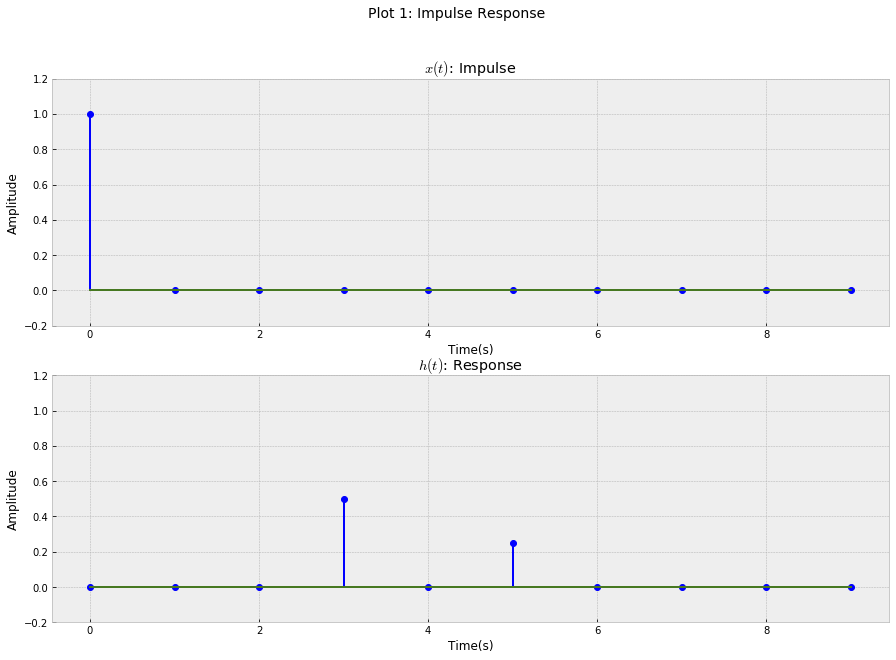

In [60]:
# This code block plots the impulse response. Neglect if only interested in result

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]

def do_subplot(fig, sub, title, x, y, c = 'b'):
    ax = fig.add_subplot(sub)
    ax.set_title(title)
    ax.set_ylim([-0.2, 1.2])
    ax.set_xlabel('Time(s)')
    ax.set_ylabel('Amplitude')
    ax.stem(x, y, linefmt = c + '-', markerfmt = c + 'o')

t = np.arange(0, 10)
x1 = np.zeros(t.shape) 
x1[0] = 1.0
y1 = np.zeros(t.shape)
y1[[3, 5]] = 0.5, 0.25

fig = plt.figure()
fig.suptitle('Plot 1: Impulse Response', fontsize=14)
do_subplot(fig, 211, '$x(t)$: Impulse', t, x1)
do_subplot(fig, 212, '$h(t)$: Response', t, y1)

Let's understand the graphs above. The first graph shows the input $x(t)$ - Joe's yell. We will be referring
everything else to that yell. Therefore, the amplitude of that yell is 1.0. The time of that yell is taken
as t = 0s. Such an input of unit amplitude at time 0 is called an **impulse** input.

The second graph depicts the echoes - the response to the yell (impulse). It is aptly called the **impulse
response**. The first dot represents the first echo that comes 3s after the yell with amplitude 0.5. The
second dot represent the second echo from the farther hill that comes 5s after the yell with amplitude 0.25.

The echoes to the yell are created by the 2 hills. The time and strength of the echoes depend on the size and
distance of the hills. These two hills thus form the **system** that responds to the impulse. In case of
electrical systems, the system may be a circuit that responds to an input signal based on the value of its
components. In any case, our interest in the system is only about how it modifies the input signal. Therefore,
we forget the unnecessary physical aspects of the system. *The system is completely represented by the impulse
response*.

**Linearity:** Let's say that Joe yells twice as loud as before. What happens to the echoes? Obviously, the
echoes will be twice as loud too. And what if Alice joins Joe in yelling, and the yell together? Again, the
echo will have both Alice's and Joe's name combined. Mathematically, the output is just the sum of response
to each input. 

Let's say $x_1(t)$ is Joe's yell and the echoes is $y_1(t)$. Similarly, $x_2(t)$ is Alice's yell and $y_2(t)$
is echoes to that. Then if Joe and Alice yell together, the echo would be $y_1(t) + y_2(t)$. This property of
the system is called *linearity*.

**Time Invariance:** The timing of the echoes is determined by the distance of the hills from Joe. But since
the hills are stationary, you wouldn't expect the delay in echoes to change. This property of the system is
called *time invariance*. This property obviously wont hold if we had imagined moving vehicles instead of hills.
Not every system is time invariant.

Any system that has Linearity and Time Invariance properties is called a **Linear Time Invariant** or **LTI**
system. From the description above, you will instinctively know that LTI systems are simpler to understand
and analyze. Many systems in nature - like atmosphere carrying sound waves, or telephone lines carrying
electrical voice are LTI systems. There are lots of non-LTI system too. But many non-LTI systems can be
approximated judiciously as LTI systems under restricted circumstances, to simplify analysis. We will be
studying LTI systems exclusively for the rest of this document. Convolution sums make sense only for LTI systems.